Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

Data Dictionary
RowNumber: Row number.
CustomerId: Unique identification key for different customers.
Surname: Surname of the customer
Credit Score: A credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
Geography: The country to which the customer belongs.
Gender: The gender of the customer.
Age: Age of the customer.
Tenure: The period of time a customer has been associated with the bank.
Balance: The account balance (the amount of money deposited in the bank account) of the customer.
NumOfProducts: How many accounts, bank account affiliated products the person has.
HasCrCard: Does the customer have a credit card through the bank?
IsActiveMember: Subjective, but for the concept
EstimatedSalary: Estimated salary of the customer.
Exited: Did they leave the bank after all?

### 1. Reading Dataset and Feature Elimination

In [1]:
 # This allows each cell to output everything instead of just the last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import tensorflow as tf
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
# pip install google-colab
# !pip install tensorflow==2.0.0

# Using Tensorflow Keras instead of the original Keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc


import warnings
warnings.filterwarnings('ignore')

/Users/khaledsharafaddin/opt/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
Using TensorFlow backend.


In [2]:
bank = pd.read_csv('/Users/khaledsharafaddin/Documents/Univ_Austin_Texas ML_AI/DataSets/Bank.csv')

In [3]:
# Data types
bank.dtypes
# missing values? none 
bank.isnull().sum() 
# Shape 
bank.shape  # 5000 by 14 


# Eliminating features that are not useful in the prediction like customerID and surname, rownumb
bank = bank.drop(['RowNumber','CustomerId','Surname'], axis=1)
# Few samples
bank.head()

# summary statistics
bank.describe()

# Looking at the unique categorical features:
bank.Geography.value_counts()/bank.shape[0]*100
bank.Gender.value_counts()/bank.shape[0]*100
bank.HasCrCard.value_counts()/bank.shape[0]*100
bank.IsActiveMember.value_counts()/bank.shape[0]*100

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

(10000, 14)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


France     50.14
Germany    25.09
Spain      24.77
Name: Geography, dtype: float64

Male      54.57
Female    45.43
Name: Gender, dtype: float64

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

### 2. Perform an Exploratory Data Analysis on the data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


<Figure size 1440x1440 with 0 Axes>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc49c877110>,
      dtype=object)

0.0    36.17
Name: Balance, dtype: float64

0    79.63
1    20.37
Name: Exited, dtype: float64

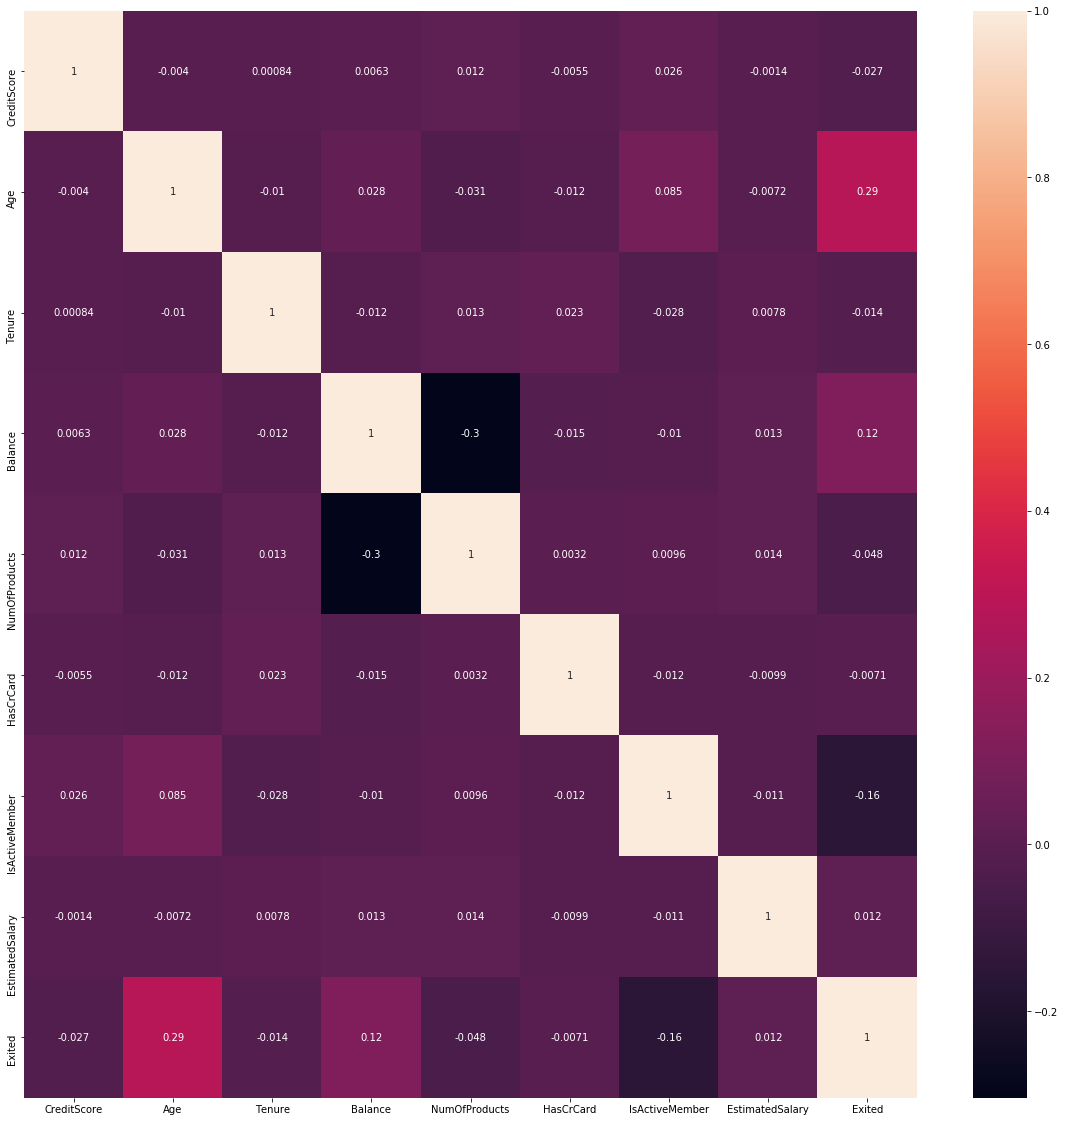

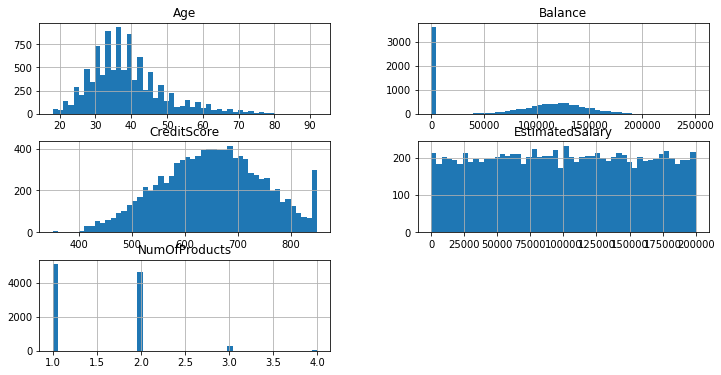

In [4]:
# 1. Correlations between features 

bank.corr()
plt.figure(figsize=(20,20))
sns.heatmap(bank.corr(), annot=True)


# 2. Historgram for the distribution of continous features
columns = ['Age', 'CreditScore', 'Balance', 'NumOfProducts', 'EstimatedSalary']
bank[columns].hist(stacked=False, bins=50, figsize=(12,30), layout=(14,2))

# 3. Looking at the zero balance customers 
zero_balance = bank[bank['Balance'] == 0]
zero_balance.Balance.value_counts()/bank.shape[0]*100

# 4. Existed value count 
bank.Exited.value_counts()/bank.shape[0]*100


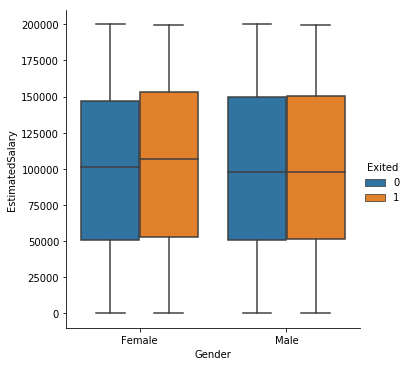

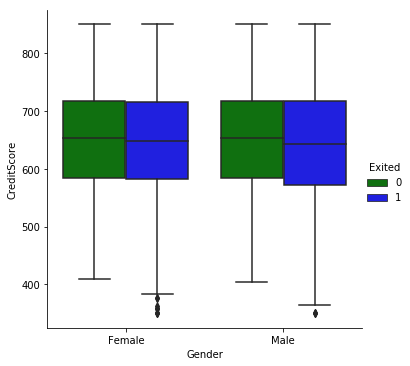

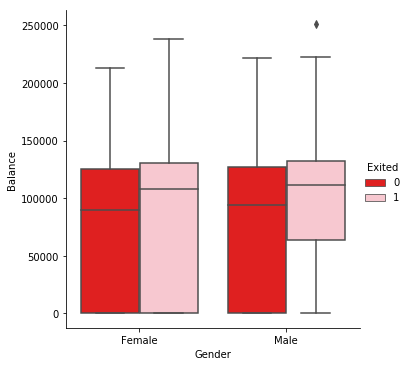

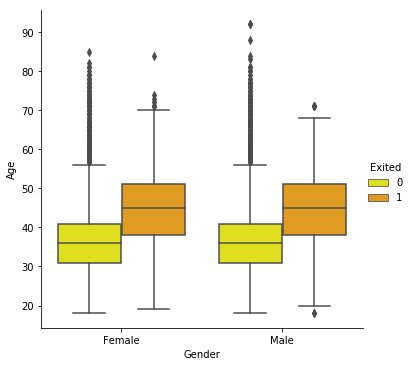

In [5]:
# Categorical Plots 

# Gender and salary
sns.catplot(x="Gender", y="EstimatedSalary", kind="box",hue="Exited", data=bank)

# Gender, and creditScore
sns.catplot(x="Gender", y="CreditScore", kind="box",hue="Exited", data=bank, palette=sns.color_palette(['green', 'blue']))

# Gender and balance
sns.catplot(x="Gender", y="Balance", kind="box",hue="Exited", data=bank, palette=sns.color_palette(['red', 'pink']))

# Gender and age
sns.catplot(x="Gender", y="Age", kind="box",hue="Exited", data=bank, palette=sns.color_palette(['yellow', 'orange']))


### Illustrate the insights based on EDA
- Almost all of correlations between variables are weak.
- There is a strong negative correlation between the number of products a customer has and age as well as balance of -0.3
- There is a strong negative correlation between whether a customer is active and whether they existed the bank of -0.16

- Age is slightely skewed to the right where some of the customers are in their 70s, and 80s. However, most of the customers are between 25 and 45 years old
- Number of products and credit scores are uniform in shape. 
- Estimated Salary feature is uniformally distributed with mean 100,090 and median 100,193

- About 36% of customers have no balance 
- 80% of customers have not existed the bank, while 20% have existed. 

- There is no statistically significant difference between estimated salary and credit scores for males and females who existed and did not exist the bank.
- Female customers who have existed the bank and who did not exist the bank have very similar balances, 
while male customers who existed the bank has lower balance than the male customers who did not exist the bank.

- Both male and female customers who existed the bank appear to be approximately 10 years younger than customers who did not exist the bank. 


### 3. Data Pre-processing and Scaling

In [6]:
# 1. Convert categorical variables into dummy variables
onehotencoder = ['Geography', 'Gender']
bank = pd.get_dummies(bank, columns = onehotencoder)

# 2. Split into X  and y and train and test
X = bank.drop(['Exited'], axis=1)
y = bank['Exited']

In [7]:
# 2. Split and Scale the data 

# Split into train and test, with stratify because there is class imbalance
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# 3.Rescale the data:

y_train =  np.array(y_train)
y_test =  np.array(y_test)


# Define the scaler 
scaler = StandardScaler().fit(x_train)

# Scale the train set
X_train = scaler.transform(x_train)

# Scale the test set
X_test = scaler.transform(x_test)


### which metric is right for model? 
- We are interested in finding customers who may churn from the bank.
- The travel package purchase dataset has class imbalance. Approx. 80% of the customers  are 1, and therefore accuracy is not a good measure.
- Recall: aims to find the proportion of actual positives was identified correctly. 
- Therefore, recall is a good measure here, because the marketing cost of identifying customers who might churn costly.

### 4. Build NN Model

In [8]:
# Create a confusion matrix and metric representation: 

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='plasma_r',
                          title=None):

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [9]:
# Model 1 

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model1 = Sequential()
#Initializing the weights uisng hue_normal 
Model1.add(Dense(65, input_shape=(13, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dropout(0.5))
Model1.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model1.add(Dropout(0.5))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod1= Model1.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=200, callbacks=[es], shuffle=True, verbose=0)

ROC Value:  0.6871151122952375


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

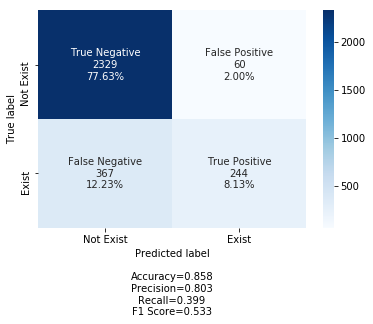

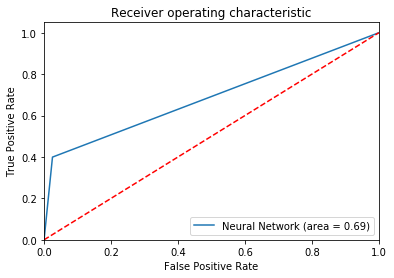

In [10]:
# Model 1 performance:

## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = Model1.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0


cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not Exist','Exist']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

# e. ROC and AUC
print('ROC Value: ', roc_auc_score(y_test, y_pred))  # 0.50

# f. plot the roc curve for the model
dnn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % dnn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DNN')
plt.show()




In [11]:
### Model 2 performance:

model2 = Sequential()

model2.add(Dense(units=16, input_dim = 13,activation='relu'))  
model2.add(Dense(units=24,activation='relu'))

#Adding Dropout to prevent overfitting 
model2.add(Dropout(0.5))
model2.add(Dense(24,activation='relu'))
model2.add(Dense(24,activation='relu'))

# We use the sigmoid because we want probability outcomes
model2.add(Dense(1,activation='sigmoid')) 

# compile the keras model
model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                              verbose=0, mode='min', restore_best_weights= True)



# fit the keras model on the dataset
history=model2.fit(X_train,y_train,batch_size=50,epochs=250,validation_split=0.2, callbacks=[es], 
                  shuffle=True ,verbose=0)



### 5. Model Performance Improvement

3000/3000 [==============================] - 0s 33us/step
score:  [0.3574504630565643, 0.8500000238418579]


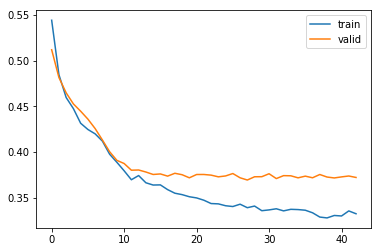

In [12]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

score = model2.evaluate(X_test, y_test)
print('score: ', score)   # 0.85

ROC Value:  0.6987454090933691


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic')

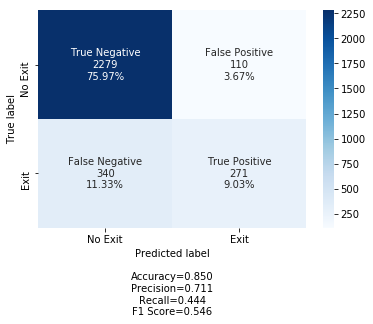

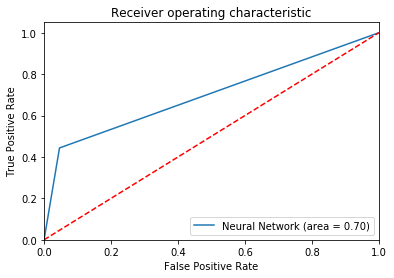

In [13]:
## Confusion Matrix on unsee test set
import seaborn as sn
y_pred = model2.predict(X_test)
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0


cm=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'No Exit','Exit']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

# e. ROC and AUC
print('ROC Value: ', roc_auc_score(y_test, y_pred))  # 0.50

# f. plot the roc curve for the model
dnn_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Neural Network (area = %0.2f)' % dnn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DNN')
plt.show()



### Conclusion and key takeaways
- The first model has a low value for a recall of 0.39, and imporves slightely to 0.45 in model2.
- Both model 1 and model 2 have high precision values of 80 and 73 respectively. 
- Since we are interested in minimizing false negatives, model 1 and model 2 have 12% and 11% FN rates which is not bad.
- ROC curve in model 2 performs better with 0.71 and therefore, this model should be used instead of model 1. 
- Recommendations to imporve the neural network models is to further tune parameters such as epochs, batch_size, and weights. Moreover, the models can be further improved by using L1 or L2 regularization techniques.  